<a href="https://colab.research.google.com/github/Harshit-Chouksey/CMPE257_Project_Market_Trends/blob/main/Random_Forest/Optimized_Parameter_on_Stocks/Pfizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
Training Time: 1.389758825302124 seconds
Predicting Time: 0.02481365203857422 seconds
Mean Squared Error: 0.09686009560731461


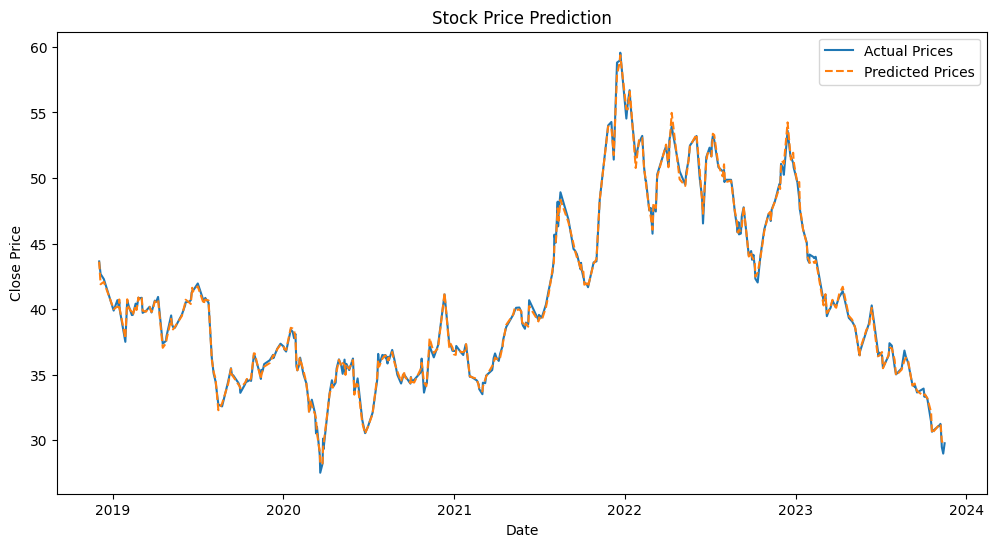

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

# Function to get historical stock data using Yahoo Finance API
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to create features for prediction
def create_features(data):
    data['Date'] = data.index
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data = data.drop(['Date'], axis=1)
    return data

# Function to train and evaluate the Random Forest model
def train_random_forest(data):
    X = data.drop(['Close'], axis=1)
    y = data['Close']

    # Split the data into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest model with specified parameters
    model = RandomForestRegressor(n_estimators=200,
                                  max_depth=10,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  max_features=None,
                                  random_state=42)

    # Measure training time
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Calculate training time
    training_time = time.time() - start_time
    print(f'Training Time: {training_time} seconds')

    # Measure predicting time
    start_time = time.time()

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate predicting time
    predicting_time = time.time() - start_time
    print(f'Predicting Time: {predicting_time} seconds')

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')

    # Sort the test data by date for proper plotting
    sorted_indices = X_test.index.argsort()
    X_test_sorted = X_test.iloc[sorted_indices]
    y_test_sorted = y_test.iloc[sorted_indices]
    predictions_sorted = predictions[sorted_indices]

    # Plot actual vs. predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(X_test_sorted.index, y_test_sorted.values, label='Actual Prices')
    plt.plot(X_test_sorted.index, predictions_sorted, label='Predicted Prices', linestyle='dashed')
    plt.title('Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Set the stock symbol, start date, and end date (last 5 years)
    stock_symbol = 'PFE'
    end_date = pd.to_datetime('today')
    start_date = end_date - pd.DateOffset(years=5)

    # Get historical stock data
    stock_data = get_stock_data(stock_symbol, start_date, end_date)

    # Create features for prediction
    stock_data_features = create_features(stock_data)

    # Train and evaluate the Random Forest model
    train_random_forest(stock_data_features)
